My phase 1 project dataset consists of only discrete variables, hence I am using a different dataset from Kaggle to perform a non-parametric test. 

This data shows sales for a marketing campaign to determine the most effective promotion.


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, levene, kruskal
from statsmodels.stats.multicomp import MultiComparison


In [7]:
df = pd.read_csv("WA_Marketing-Campaign.csv")

In [10]:
df.head(6)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67


In [15]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [17]:
df.isna().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

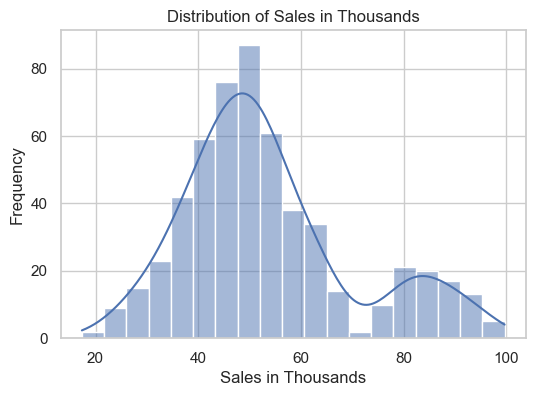

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Histogram of SalesInThousands
plt.figure(figsize=(6,4))
sns.histplot(df['SalesInThousands'], kde=True)
plt.title('Distribution of Sales in Thousands')
plt.xlabel('Sales in Thousands')
plt.ylabel('Frequency')
plt.show()


### Normality Check

For checking the assumption of normality, we will use the Shapiro-Wilk test.

H0: The distribution is normally distributed

Ha: The distribution is not normally distributed

In [55]:
# Perform the Shapiro-Wilk test for each promotion group
promotions = df["Promotion"].unique()

for promotion in promotions:
    
    p_value = shapiro(df[df["Promotion"] == promotion]["SalesInThousands"])[1]
    
    print("Promotion : {} \t P-value : {} \t Reject H_0: {}".format(promotion, p_value, p_value<0.05))

Promotion : 3 	 P-value : 1.49946592611918e-08 	 Reject H_0: True
Promotion : 2 	 P-value : 5.457099666274281e-09 	 Reject H_0: True
Promotion : 1 	 P-value : 1.97726450444774e-08 	 Reject H_0: True


The sales data distribution is not normal, so parametric tests such as ANOVA and t-tests are not applicable.

### Kruskal-Wallis Test: 
This test is the nonparametric equivalent of the one-way ANOVA and used when the normality assumption is violated.

The null hypothesis of the Kruskal-Wallis test is that the population medians of all groups are equal.

In [44]:
test_stat, p_value = stats.kruskal(
                            df[df["Promotion"] == 1]["SalesInThousands"], 
                            df[df["Promotion"] == 2]["SalesInThousands"], 
                            df[df["Promotion"] == 3]["SalesInThousands"])

print("P-value:", p_value)

P-value: 2.6741866266697816e-12


P-values lesser than 0.05 in Kriskal-Wallis tests reject the null hypothesis and indicate statistically significant differences in the median sales across the different promotions

Therefore, the Promotion type likely influences Sales.

We reject the null hypothesis meaning that at least one group differs in median from the others.

We must conduct post-hoc tests to determine which groups differ from one another and to understand the effectiveness of each promotion.  
